In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data manipulation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#missing values

import missingno as msno

#data visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [2]:
df_atleta = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
df_atleta.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df_atleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


**Data content**

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F (Male or Female)
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

In [4]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
df_atleta.rename(columns={"ID":"id_atleta", "Name":"nome_atleta", "Sex":"sexo_atleta", "Age":"idade", "Height":"altura_atleta", "Weight":"peso_atleta", "Team":"equipe", "NOC":"noc", "Season":"temporada", "Games":"ano_temporada", "Year":"ano", "City":"cidade_sede", "Sport":"modalidade_esportiva", "Event":"evento", "Medal":"medalha"}, inplace=True)
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Filtrando somente os jogos olímpicos de Verão (Summer)

In [6]:
df_atleta["temporada"].nunique()

2

In [7]:
df_atleta["temporada"].unique()

array(['Summer', 'Winter'], dtype=object)

In [8]:
df_atleta = df_atleta[df_atleta["temporada"] == "Summer"]
df_atleta["temporada"].unique()

array(['Summer'], dtype=object)

In [9]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


## Informações Estatísticas iniciais

In [10]:
df_atleta.describe().round(3) 

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,222552.000,213363.000,170695.000,168698.000,222552.000
mean,67998.926,25.674,175.516,70.689,1976.317
std,39139.038,6.700,10.915,14.804,30.943
min,1.000,10.000,127.000,25.000,1896.000
25%,34000.750,21.000,168.000,60.000,1956.000
50%,68302.500,24.000,175.000,70.000,1984.000
75%,101881.000,28.000,183.000,79.000,2000.000
max,135568.000,97.000,226.000,214.000,2016.000


#### Incluindo parâmetros de objects

In [11]:
df_atleta.describe(include="O") ##incluindo as colunas do type object

,nome_atleta,sexo_atleta,equipe,noc,ano_temporada,temporada,cidade_sede,modalidade_esportiva,evento,medalha
count,222552,222552,222552,222552,222552,222552,222552,222552,222552,34088
unique,116122,2,1157,230,29,1,23,52,651,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,163109,14526,15064,13821,222552,22426,38624,5733,11459


# Tratamento de dados

## Vamos verificar os dados faltantes nesse dataframe para melhor tratamento de dados

In [12]:
df_atleta.isnull().head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [13]:
df_atleta.isnull().sum().sort_values(ascending=False)

medalha                 188464
peso_atleta              53854
altura_atleta            51857
idade                     9189
id_atleta                    0
nome_atleta                  0
sexo_atleta                  0
equipe                       0
noc                          0
ano_temporada                0
ano                          0
temporada                    0
cidade_sede                  0
modalidade_esportiva         0
evento                       0
dtype: int64

## Utilizando o missingno

<AxesSubplot:>

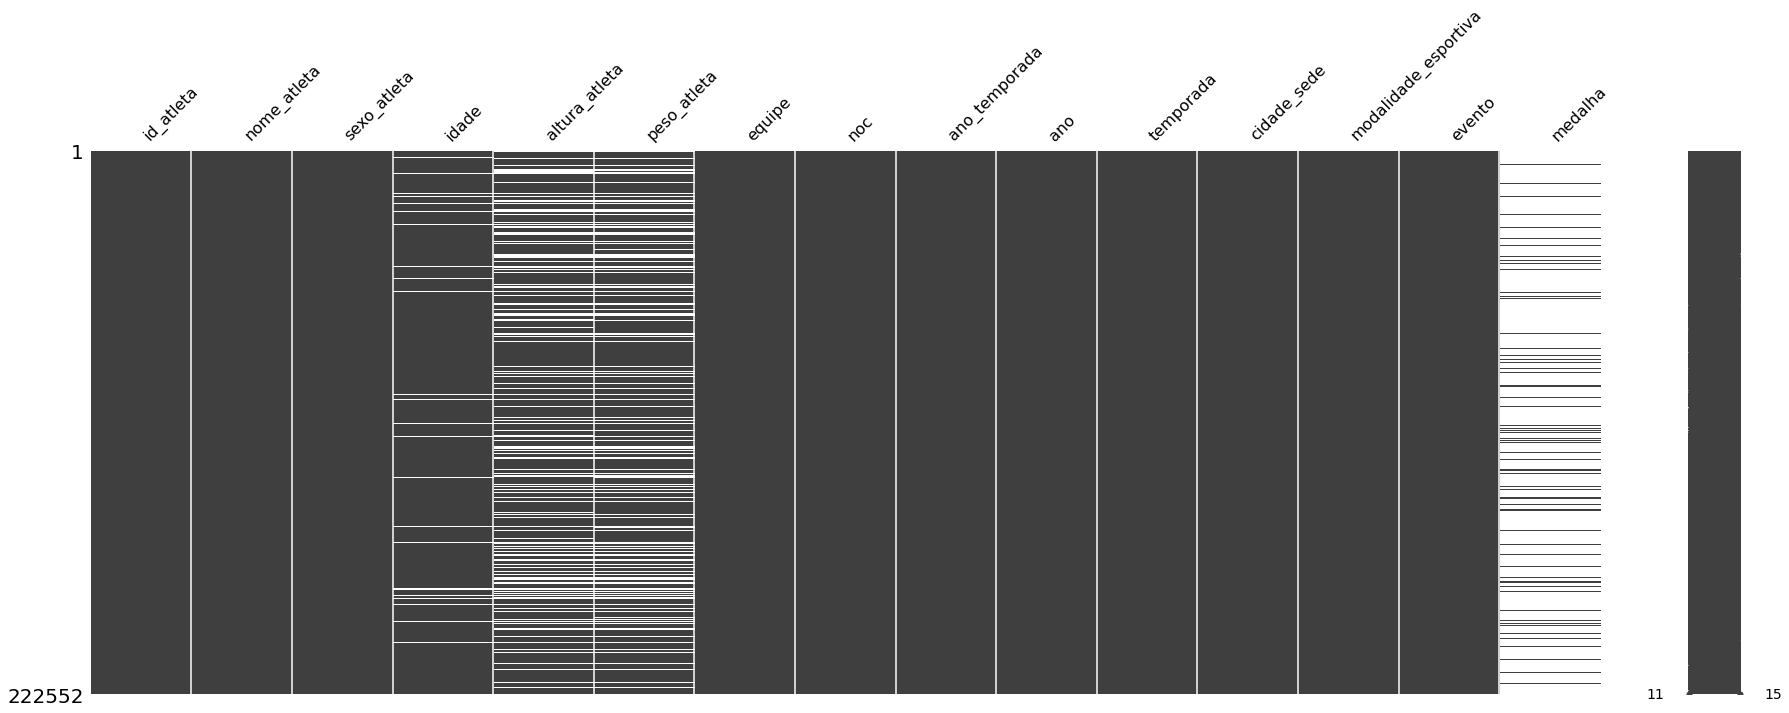

In [14]:
msno.matrix(df_atleta, figsize=(30,10))

### Verificando dados em duplicata

In [15]:
df_atleta[df_atleta.duplicated()].count()

id_atleta               1385
nome_atleta             1385
sexo_atleta             1385
idade                   1226
altura_atleta             28
peso_atleta               37
equipe                  1385
noc                     1385
ano_temporada           1385
ano                     1385
temporada               1385
cidade_sede             1385
modalidade_esportiva    1385
evento                  1385
medalha                   11
dtype: int64

In [16]:
df_atleta[df_atleta.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [17]:
df_atleta.shape

(222552, 15)

In [18]:
df_atleta.drop_duplicates(inplace=True)

In [19]:
df_atleta.shape

(221167, 15)

#### Removemos os dados em duplicata

## Avaliando as Features (colunas)

In [20]:
df_atleta.head(2)

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


id_atleta - identificação única de cada atleta

In [21]:
df_atleta["nome_atleta"].nunique()

116122

sexo_atleta

In [22]:
df_atleta['sexo_atleta'].unique()

array(['M', 'F'], dtype=object)

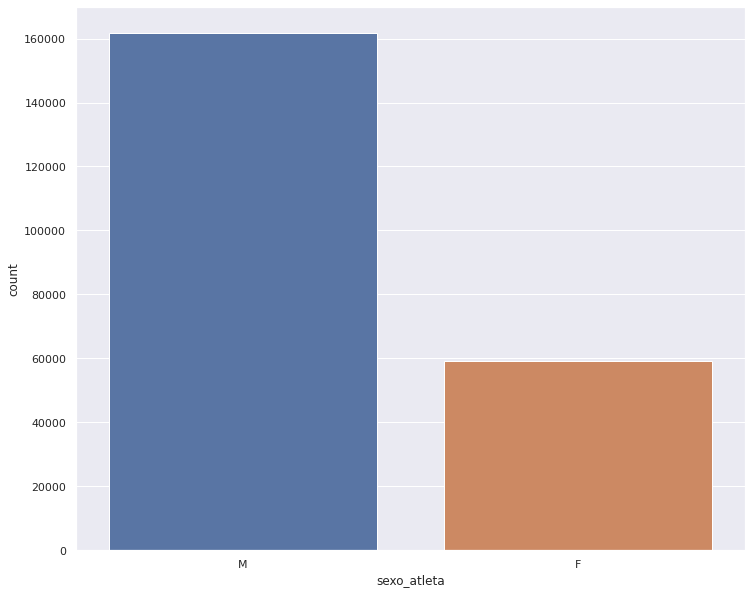

In [23]:
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid")
sns.countplot(x = "sexo_atleta", data=df_atleta)
plt.show()

In [24]:
df_atleta["sexo_atleta"].value_counts()

M    161868
F     59299
Name: sexo_atleta, dtype: int64

In [25]:
df_atleta["idade"].min()

10.0

In [26]:
df_atleta["idade"].max()

97.0

In [27]:
df_atleta[df_atleta["idade"] == 97]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [28]:
df_atleta[df_atleta["idade"] == 10]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [29]:
df_atleta["idade"].sort_values(ascending=False)

257054    97.0
98118     96.0
60861     88.0
9371      84.0
154855    81.0
          ... 
270679     NaN
270774     NaN
270793     NaN
270804     NaN
270805     NaN
Name: idade, Length: 221167, dtype: float64

In [30]:
df_atleta[df_atleta["idade"] == 96]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


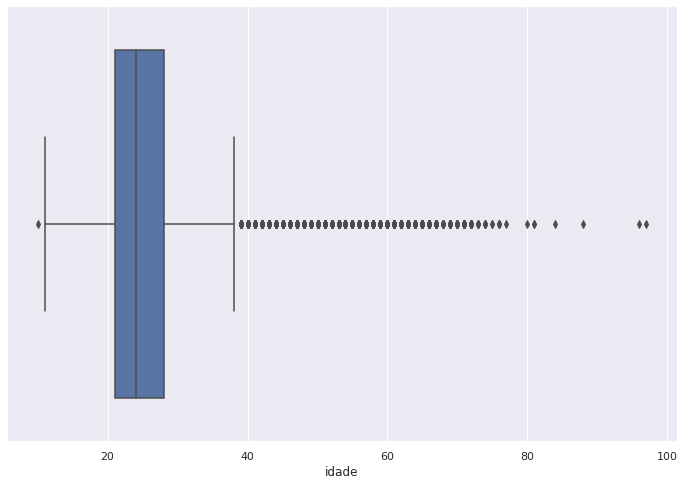

In [31]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.boxplot(x="idade", data=df_atleta)
plt.show()

In [32]:
df_atleta["idade"].describe().round()

count    212137.0
mean         26.0
std           6.0
min          10.0
25%          21.0
50%          24.0
75%          28.0
max          97.0
Name: idade, dtype: float64

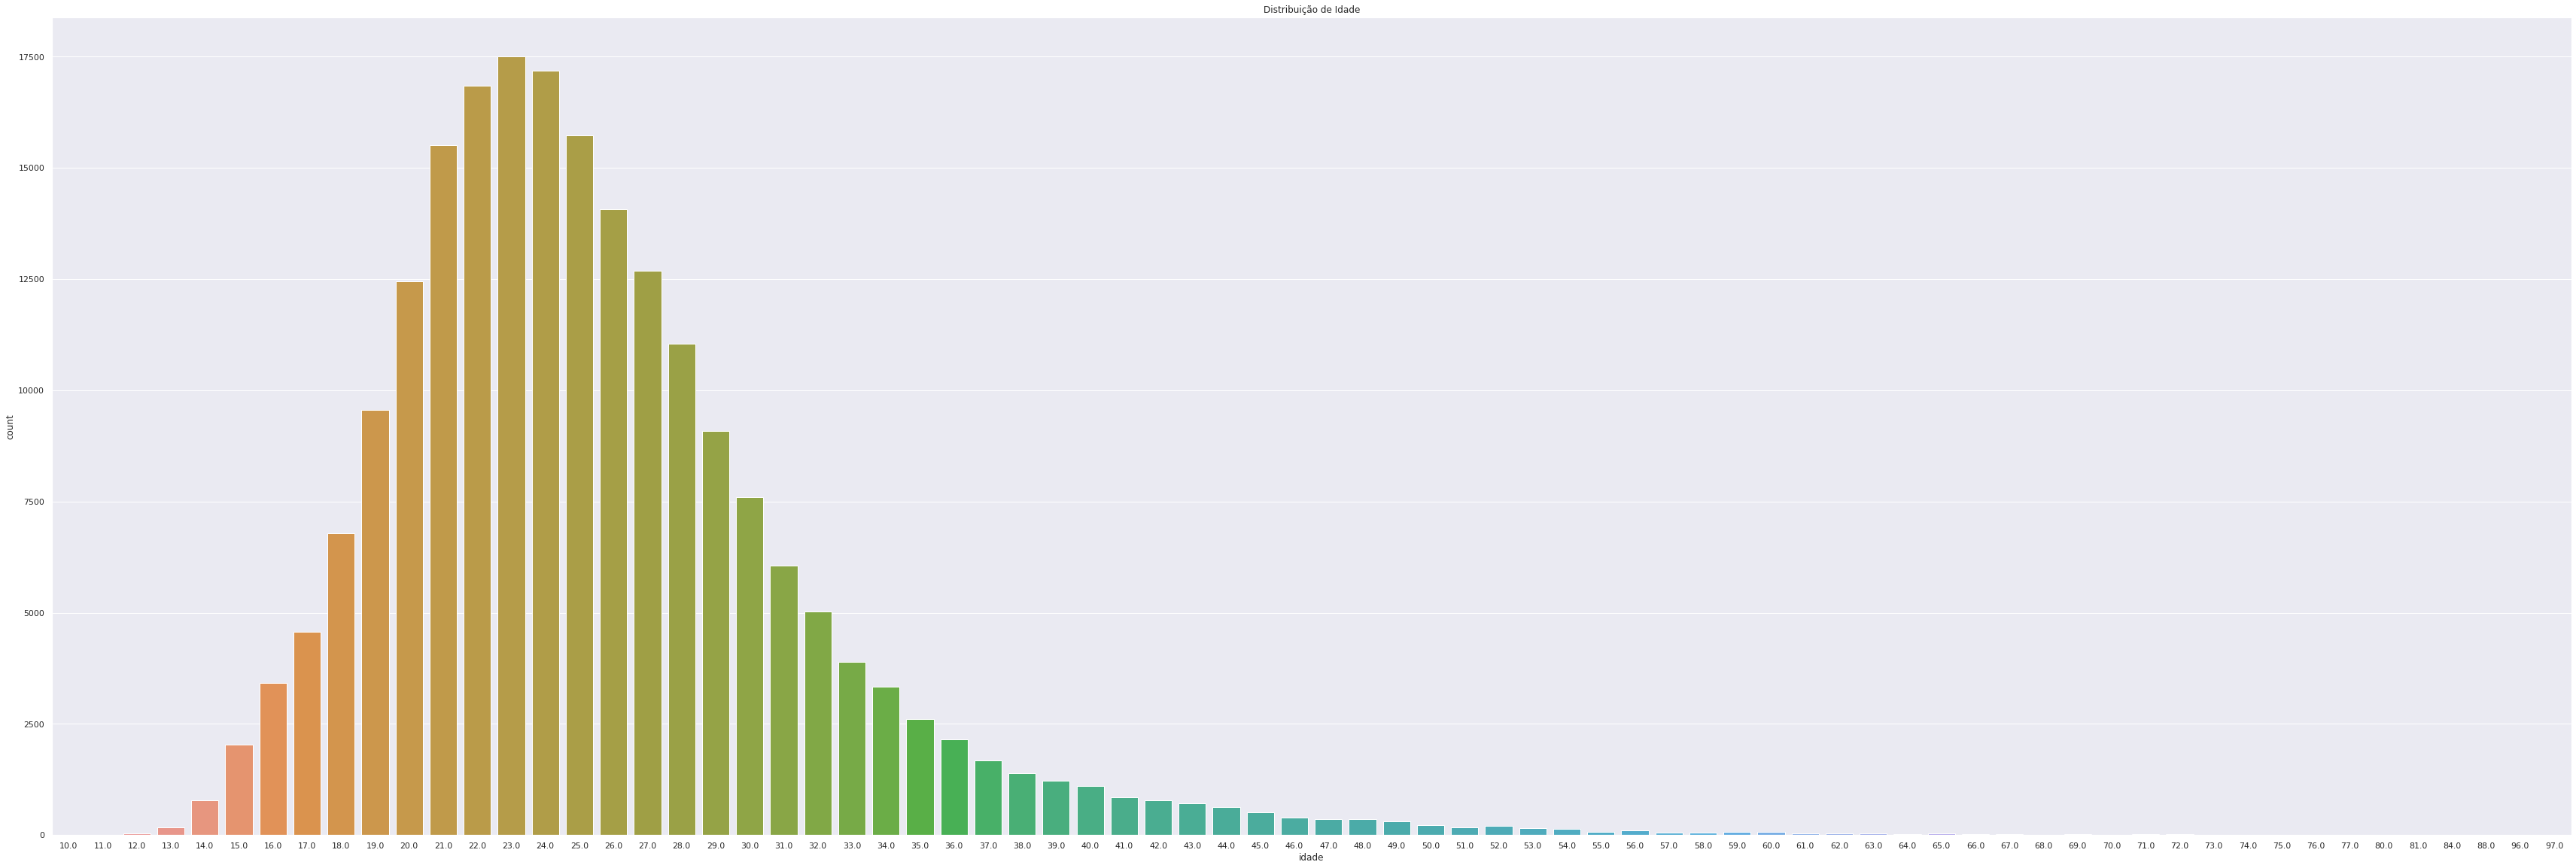

In [33]:
plt.figure(figsize=(60,20))
plt.tight_layout()
sns.countplot(x="idade", data=df_atleta)
plt.title("Distribuição de Idade")
plt.show()


In [34]:
df_atleta["altura_atleta"].describe()

count    170667.000000
mean        175.515560
std          10.914843
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: altura_atleta, dtype: float64

In [35]:
df_atleta[df_atleta["altura_atleta"] == 226]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


In [42]:
df_atleta_acima200 = df_atleta[df_atleta["altura_atleta"] >= 200]
df_atleta_acima200.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
443,246,Mamdouh Abdelrehim,M,26.0,207.0,90.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
820,468,Abdelhalim Muhammad Abou,M,27.0,210.0,88.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
833,474,Essameldin Abou El-Nein,M,29.0,205.0,102.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN


### Quais as modalidades dos atletas com altura superior a 2,0 m?

In [45]:
df_atleta_acima200["modalidade_esportiva"].unique()

array(['Volleyball', 'Basketball', 'Rowing', 'Judo', 'Swimming',
       'Taekwondo', 'Athletics', 'Handball', 'Beach Volleyball', 'Tennis',
       'Wrestling', 'Water Polo', 'Sailing', 'Football', 'Canoeing',
       'Cycling', 'Boxing', 'Shooting', 'Weightlifting', 'Fencing',
       'Badminton', 'Hockey', 'Baseball'], dtype=object)

### Qual o número de modalidades?

In [47]:
df_atleta_acima200["modalidade_esportiva"].nunique()

23